In [1]:
import pandas as pd
import numpy as np
Data1=pd.read_csv(r"C:\Users\Anju\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
Data=Data1

In [19]:
for i in Data.columns:
    print(f"Unique {i}'s count: {Data[i].nunique()}")
    print(f"{Data[i].unique()}\n")

Unique customerID's count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique gender's count: 2
['Female' 'Male']

Unique SeniorCitizen's count: 2
[0 1]

Unique Partner's count: 2
['Yes' 'No']

Unique Dependents's count: 2
['No' 'Yes']

Unique tenure's count: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique PhoneService's count: 2
['No' 'Yes']

Unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']

Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']

Unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']

Unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']

Unique TechSupport's count: 3
['No' 'Yes' 'No internet service']

Unique StreamingTV's

In [2]:
Data=Data.replace(r'^\s*$',np.nan,regex=True)
Data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [3]:
total_charges_median = Data.TotalCharges.median()
Data['TotalCharges'] = Data['TotalCharges'].apply(pd.to_numeric)
Data['TotalCharges'].fillna(total_charges_median, inplace=True)
#Data['SeniorCitizen'] = Data['SeniorCitizen'].apply(str)

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns

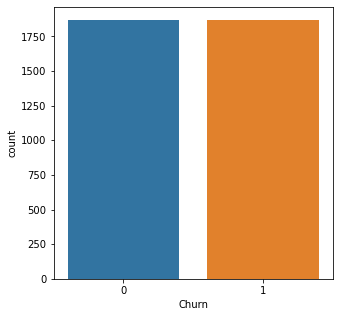

In [67]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=y_rs)
plt.show()

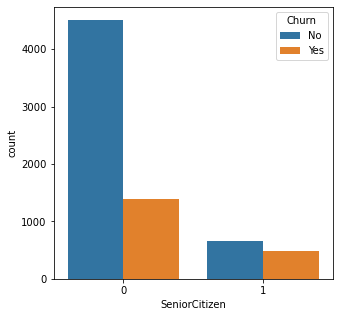

In [6]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=Data['SeniorCitizen'], hue=Data['Churn'])
plt.show()

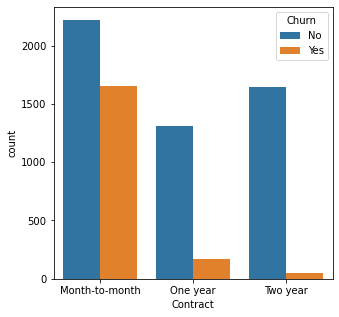

In [7]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=Data['Contract'], hue=Data['Churn'])
plt.show()

In [4]:
Data=Data.drop(columns='customerID')
numeric_features=[col for col in Data.select_dtypes(['float','int64']).columns.tolist()]
num=Data[numeric_features]
Q1=num.quantile(0.25)
Q3=num.quantile(0.75)
IQR=Q3-Q1
Q1-1.5*IQR
Q3+1.5*IQR


SeniorCitizen        0.0000
tenure             124.0000
MonthlyCharges     171.3750
TotalCharges      8863.1625
dtype: float64

In [5]:
binary_feature = Data.nunique()[Data.nunique() == 2].keys().tolist()
binary_feature

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in binary_feature:
     Data[i]=le.fit_transform(Data[i])

In [7]:
categorical_features=[col for col in Data.select_dtypes(['object']).columns.tolist()]
df_categorical_dummies=pd.get_dummies(Data,columns=categorical_features)

In [8]:
X=df_categorical_dummies.drop('Churn',axis=1)
y=df_categorical_dummies['Churn']
from imblearn.under_sampling import RandomUnderSampler
rs=RandomUnderSampler()
X_rs,y_rs=rs.fit_resample(X,y)

In [9]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
features_mms=['tenure','MonthlyCharges','TotalCharges']
data_feature_mms=pd.DataFrame(X_rs,columns=features_mms)
data_remaining_features=X_rs.drop(columns=features_mms,axis=1)
rescaled_feature_mms=mms.fit_transform(data_feature_mms)
data_rescaled_feature_mms=pd.DataFrame(rescaled_feature_mms,columns=features_mms,index=data_remaining_features.index)
final_data=pd.concat([data_remaining_features,data_rescaled_feature_mms],axis=1)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_data,y_rs)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
fit1=LR.fit(X_train,y_train)
X_test['PredictedChurn']=fit1.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,X_test['PredictedChurn'])


array([[342, 130],
       [ 99, 364]], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,X_test['PredictedChurn'])

0.7550802139037434